In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>


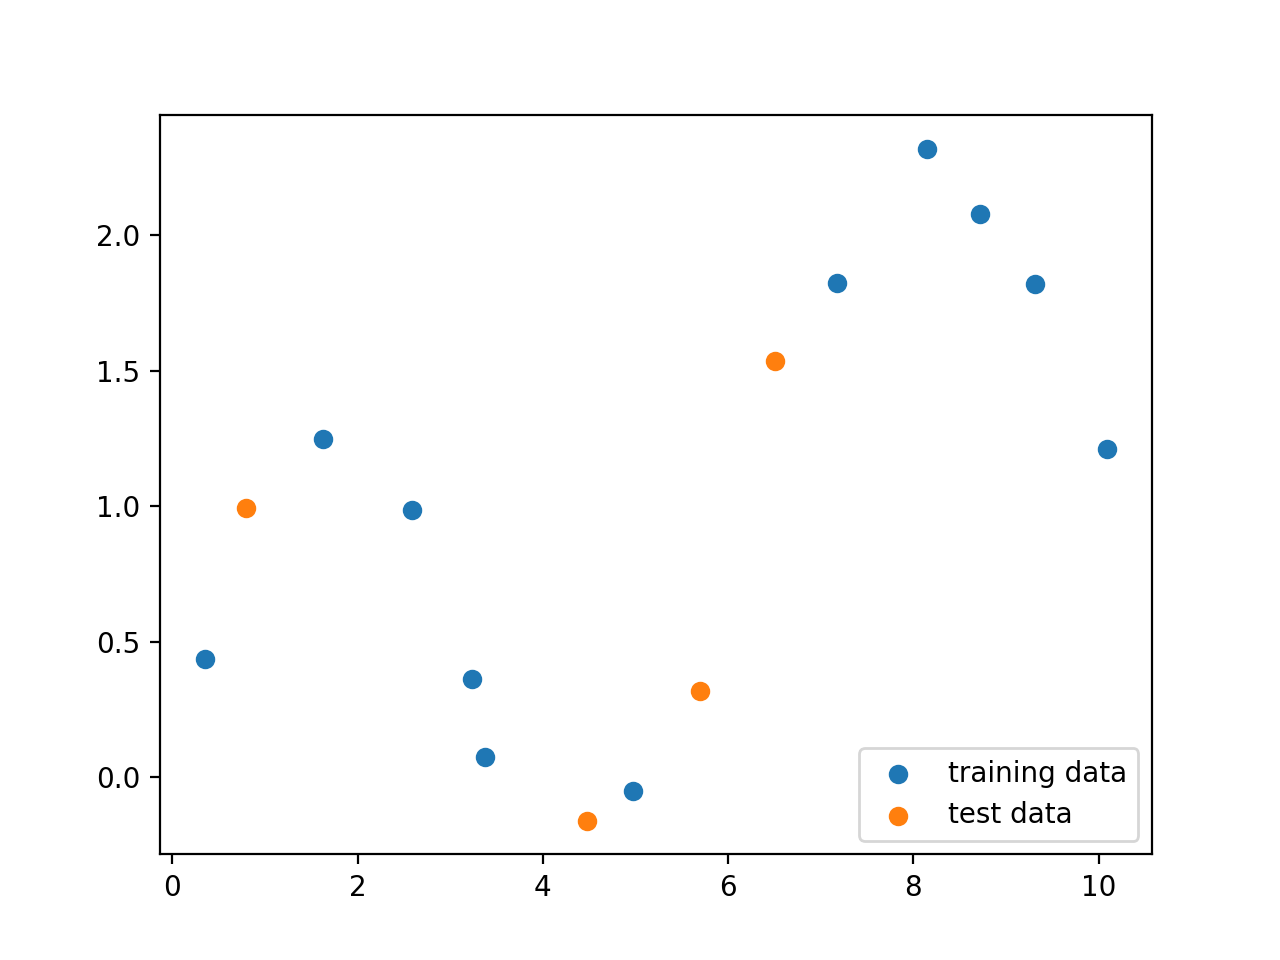

In [2]:
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x) + x/6 + np.random.randn(n)/10

X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=0)

def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure()
    plt.scatter (X_train, y_train, label = 'training data')
    plt.scatter (X_test, y_test, label = 'test data')
    plt.legend(loc = 4);
part1_scatter()

In [10]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    results = np.zeros([4,100])
    
    X_predict = np.linspace(0,10,100).reshape(-1,1)
    
    count = 0
    
    for i in [1,3,6,9]:
        poly = PolynomialFeatures(degree=i)
        X_train_poly = poly.fit_transform(X_train.reshape(-1,1))
        
        X_predict_poly = poly.fit_transform(X_predict)
        linreg = LinearRegression().fit(X_train_poly, y_train)
        tmp_ans = linreg.predict(X_predict_poly).reshape(1,-1)
        
        results[count, :] = tmp_ans
        count = count + 1
    answer = results
    return answer
answer_one()

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

<IPython.core.display.Javascript object>


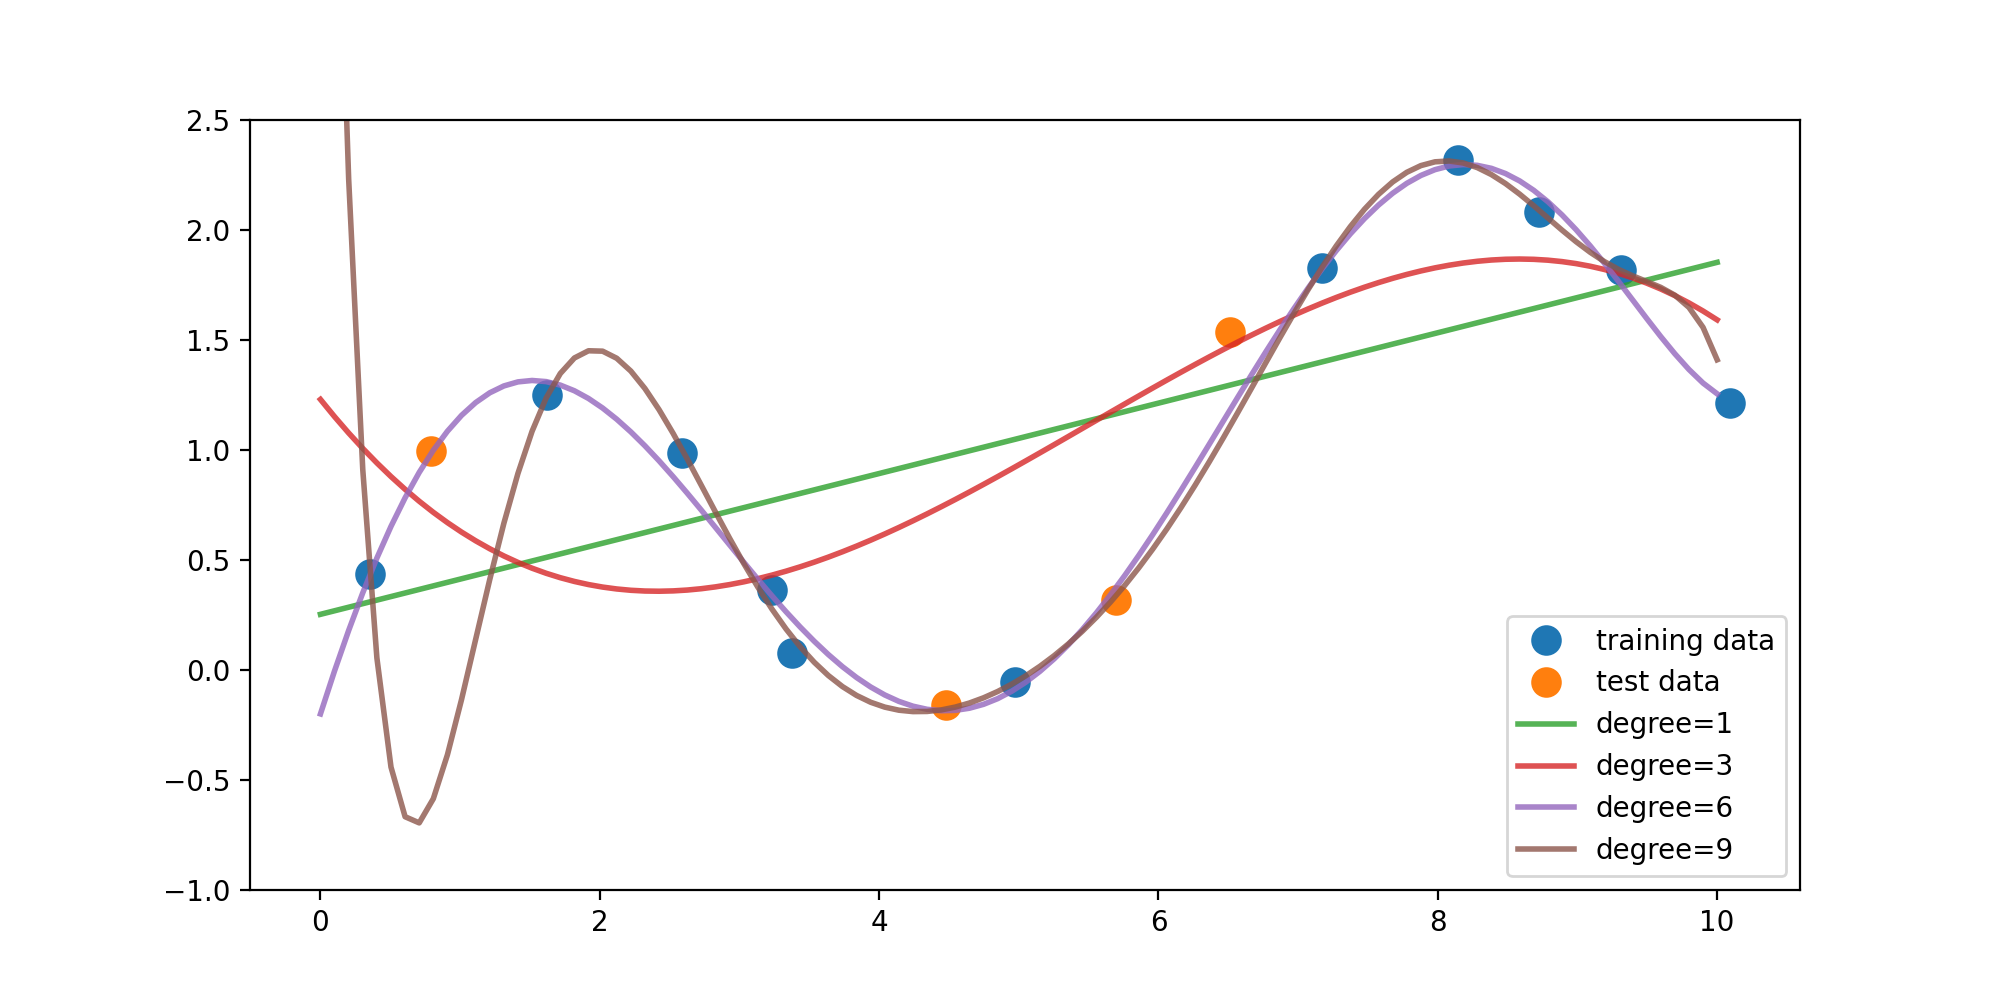

In [12]:
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure(figsize = (10,5))
    plt.plot(X_train, y_train, 'o', label = 'training data', markersize = 10)
    plt.plot(X_test, y_test, 'o', label = 'test data',markersize = 10)
    for i, degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100),degree_predictions[i], alpha = 0.8, lw=2, label = 'degree={}'.format(degree))
        plt.ylim(-1,2.5)
        plt.legend (loc=4)
plot_one(answer_one())

In [30]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score
    
    results_train = np.zeros([10,1])
    results_test = np.zeros([10,1])
    
    for i in range (0,10):
        poly = PolynomialFeatures(degree=i)
        X_train_poly = poly.fit_transform(X_train.reshape(-1,1))
        X_test_poly = poly.fit_transform(X_test.reshape(-1,1))
        linreg = LinearRegression().fit(X_train_poly,y_train)
        score_train = r2_score(y_train,linreg.predict(X_train_poly))
        score_test = r2_score(y_test, linreg.predict(X_test_poly))
        results_train[i] = score_train
        results_test[i] = score_test
        results_train = results_train.flatten()
    answer = (results_train, results_test)
    return (results_train, results_test)
answer_two()

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([[-0.47808642],
        [-0.45237104],
        [-0.06856984],
        [ 0.00533105],
        [ 0.73004943],
        [ 0.87708301],
        [ 0.9214094 ],
        [ 0.92021504],
        [ 0.63247951],
        [-0.64525377]]))

In [34]:
def answer_three():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics import r2_score
    poly = PolynomialFeatures(degree=12)
    X_train_poly = poly.fit_transform(X_train.reshape(-1,1))
    X_test_poly = poly.fit_transform(X_test.reshape(-1,1))
    linreg= LinearRegression().fit(X_train_poly, y_train)
    linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_poly, y_train)
    score_linreg_test = linreg.score(X_test_poly, y_test)
    score_lasso_test = linlasso.score(X_test_poly, y_test)
    return(score_linreg_test, score_lasso_test)
answer_three()

/Users/bharathravindran/mambaforge/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.556e-01, tolerance: 6.895e-04
  model = cd_fast.enet_coordinate_descent(


(-4.312001797497546, 0.8406625614750236)

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

mush_df = pd.read_csv('mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

In [36]:
X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state = 0)
X_subset = X_test2
y_subset = y_test2

In [37]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state = 0).fit(X_train2, y_train2)
    Series = pd.Series(data=clf.feature_importances_,index=X_train2.columns.values)
    
    results = Series.sort_values(axis=0, ascending=False).index.tolist()
    
    answer = results[:5]
    return answer
answer_five()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

In [40]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve
    
    this_C = 1.0
    clf = SVC(kernel = 'rbf', C= this_C).fit(X_train2, y_train2)
    
    param_range = np.logspace(-4,1,6)
    train_scores, test_scores = validation_curve(clf,X_subset, y_subset, param_name ='gamma', param_range = param_range, cv=3)
    training_scores_mean = np.mean(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    return (training_scores_mean, test_scores_mean)
answer_six()

(array([0.56646972, 0.93106844, 0.990645  , 1.        , 1.        ,
        1.        ]),
 array([0.56720827, 0.9300837 , 0.98966027, 1.        , 0.99458395,
        0.52240276]))

In [41]:
def answer_seven():
    param_range = np.logspace(-4,1,6)
    print(param_range)
    return(1.00000000e-04, 1.00000000e+01, 1.00000000e-01)
answer_seven()

[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01]


(0.0001, 10.0, 0.1)